In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
from math import *
import os
import sys

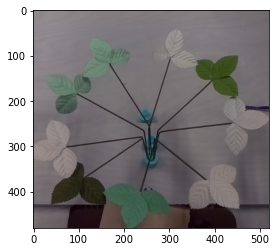

In [2]:
path = 'IMAGE_JPEG/'
img = cv2.imread(path + '10001' + '.jpg') # (480, 520, 3) col, row, channel
plt.imshow(img)

<ipython-input-3-7768fdb19ca5>:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  img[mask] = np.array([0, 0, 0],dtype=np.uint8)


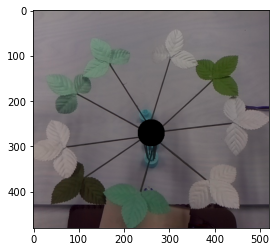

In [3]:
# mask
mask = [[],[]]
center = [270, 260] # col, row
radius = 30
for i in range(radius): # col
    for j in range(radius): # row
        if i**2 + j**2 <= radius**2:
            mask[0].append(center[0] - i);mask[0].append(center[0] + i);mask[0].append(center[0] - i);mask[0].append(center[0] + i);
            mask[1].append(center[1] - j);mask[1].append(center[1] + j);mask[1].append(center[1] + j);mask[1].append(center[1] - j);
img[mask] = np.array([0, 0, 0],dtype=np.uint8)
img[270,260]
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7ff1a08e2250>)

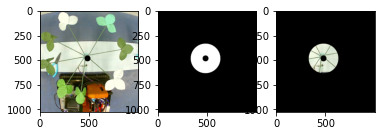

In [15]:
path = 'randomimg/'
img = cv2.imread(path + '10008' + '.jpg') # (1024, 1000, 3) col, row, channel
plt.imshow(img)
# Center coordinates 
center_coordinates = (480, 480) 
# Radius of circle 
radius = 30
# Blue color in BGR 
color = (0, 0, 0) 
# Line thickness of 2 px 
thickness = -1
img = cv2.circle(img, center_coordinates, radius, color, thickness) 
radius = 150
# img = cv2.circle(img, center_coordinates, radius, color, thickness) 
plt.subplot(1,3,1),plt.imshow(img)
mask = np.zeros(img.shape)
mask = cv2.circle(mask, center_coordinates, 150, (255,255,255), -1)
mask = cv2.circle(mask, center_coordinates, 30, (0,0,0), -1)
plt.subplot(1,3,2),plt.imshow(mask)
stick = img
stick[mask == 0] = 0
plt.subplot(1,3,3),plt.imshow(stick)

In [6]:
img.shape

(1024, 1000, 3)

(<AxesSubplot:title={'center':'red'}>,
 Text(0.5, 1.0, 'red'))

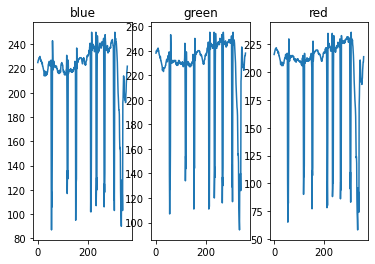

In [9]:
from math import *
# plt.imshow(stick)
center = [480, 480] # col, row
detect_len = 90
x = []
y = []
bgr_array = np.zeros((360,3))
for theta in range(360):
    x.append(int(center[0] + detect_len*cos(theta/180*pi)))
    y.append(int(center[1] + detect_len*sin(theta/180*pi)))
    bgr_array[theta,:] = np.array(stick[x[theta], y[theta]])
# plt.plot(detect_circle[:,0], detect_circle[:,1])
plt.subplot(1,3,1),plt.plot(bgr_array[:,0]),plt.title('blue')
plt.subplot(1,3,2),plt.plot(bgr_array[:,1]),plt.title('green')
plt.subplot(1,3,3),plt.plot(bgr_array[:,2]),plt.title('red')

[54, 55, 57, 58, 118, 121, 152, 155, 212, 214, 215, 234, 237, 266, 269, 305, 307, 335, 340]
19
茎干角度： [58, 121, 155, 215, 237, 269, 307, 340]
茎干根数： 8


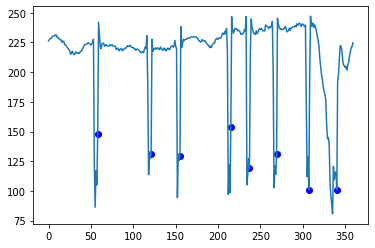

In [11]:
gray = np.mean(bgr_array,1)
plt.plot(gray)
extra_point = []
threhold_relative, threhold_dis = 0.45, 10
for i in range(1,len(gray)-1):
    if gray[i] < (gray[i-1] + gray[i+1])*threhold_relative:
        extra_point.append(i)
        
print(extra_point)
print(len(extra_point))
delete_list = []
for index,item in enumerate(extra_point):
    if abs(item - extra_point[index+1]) < threhold_dis:
        delete_list.append(item)
    if index >= len(extra_point)-2:
        break

for i in delete_list:
    extra_point.remove(i)
print('茎干角度：',extra_point)
num_stick = len(extra_point)
print('茎干根数：',num_stick)
for i in extra_point:
    plt.scatter(i, gray[i], color='b')
plt.show()

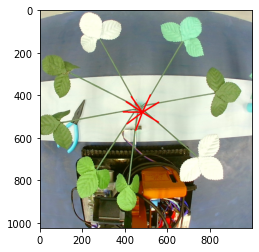

In [12]:
# visualizing sticks
path = 'randomimg/'
img = cv2.imread(path + '10008' + '.jpg') # (480, 520, 3) col, row, channel
for i in range(num_stick):
    img = cv2.line(img,(center[0],center[1]),(y[extra_point[i]], x[extra_point[i]]),(255,0,0),5)
plt.imshow(img)

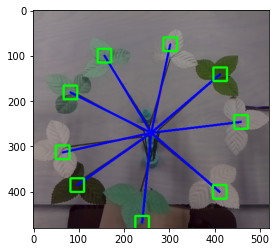

In [179]:
# visualizng my boxs
path = 'IMAGE_JPEG/'
img = cv2.imread(path + '10001' + '.jpg') # (480, 520, 3) col, row, channel
distance = 200
col_len, row_len = 15, 15
col, row = [], []
def draw_box(img,left_top,right_down):
    (left,top) = left_top
    (right,down) = right_down
    img = cv2.rectangle(img,(left,top),(right,down),(0,255,0),3)
    return 1

for i in range(num_stick):
    img = cv2.line(img,(center[0],center[1]),(y[extra_point[i]], x[extra_point[i]]),(255,0,0),3)
    theta = atan2(y[extra_point[i]] - center[0],x[extra_point[i]] - center[1])
    col.append(center[0] + int(distance*sin(theta)))
    row.append(center[1] + int(distance*cos(theta)))                       
    img = cv2.line(img,(center[0],center[1]),(col[i], row[i]),(0,0,250),3)
    # draw my boxes
    draw_box(img,(col[i]-col_len, row[i]-row_len),(col[i]+col_len, row[i]+row_len))
plt.imshow(img)

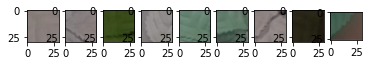

In [188]:
# my rois
path = 'IMAGE_JPEG/'
img = cv2.imread(path + '10001' + '.jpg') # (480, 520, 3) col, row, channel
img_list = []
for i in range(num_stick):
    img_list.append(img[row[i]-row_len:row[i]+row_len, col[i]-col_len:col[i]+col_len])
    plt.subplot(1,num_stick,i+1),plt.imshow(img_list[i])
plt.show()


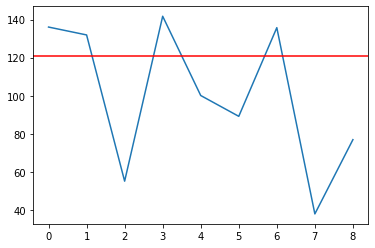

白色叶子的数量: 4


In [206]:
r_mean, g_mean, b_mean = [], [], []
for i in range(num_stick):
    r_mean.append(np.mean(img_list[i][:,:,0]))
    g_mean.append(np.mean(img_list[i][:,:,1]))
    b_mean.append(np.mean(img_list[i][:,:,2]))
rgb_mean = [r_mean, g_mean, b_mean]
for i in range(3):
#     plt.subplot(3,1,i+1),plt.plot(rgb_mean[i])
    pass
# plt.show()
# algrithm

mean = np.mean(r_mean) * 1.2
plt.plot(r_mean)
plt.axhline(y = mean, color='r', linestyle='-')
plt.show()

white_list = []
for i in range(num_stick):
    if r_mean[i] > mean:
        white_list.append(i)

print('白色叶子的数量:',len(white_list))

# 分界线

It takes me 0.031420 seconds to accomplish my task


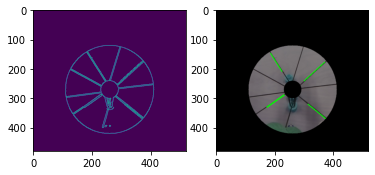

In [88]:
gray = cv2.cvtColor(stick,cv2.COLOR_BGR2GRAY)
#####################
# cv2.Canny(src, thresh1, thresh2) 进行canny边缘检测
# 参数说明: src表示输入的图片， thresh1表示最小阈值，thresh2表示最大阈值，用于进一步删选边缘信息,apertureSize：可选参数，Sobel算子的大小
# edges1 = cv2.Canny(gray,50,150,apertureSize = 3) 
# edges2 = cv2.Canny(gray,70,150) 
# edges3 = cv2.Canny(gray,50,200,apertureSize = 3) 
# plt.subplot(1,3,1),plt.imshow(edges1),plt.title('edges1');
# plt.subplot(1,3,2),plt.imshow(edges2),plt.title('edges2');
# plt.subplot(1,3,3),plt.imshow(edges3),plt.title('edges3');
# plt.show()
#####################
t1 = time.time()
gray = cv2.GaussianBlur(gray,(3,3),0) 
edges = cv2.Canny(gray, 80, 180)
plt.subplot(1,2,1),plt.imshow(edges)
minLineLength = 80
maxLineGap = 60
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
# print(lines.shape)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
t2 = time.time()
plt.subplot(1,2,2),plt.imshow(img)
print('It takes me %f seconds to accomplish my task'%(t2 - t1))

In [56]:
edges.shape

(480, 520)

# 倾斜角度识别

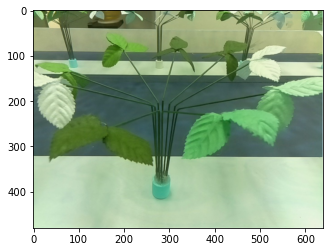

In [27]:
img_slope = cv2.imread(path + 'test'+ '1' + '.jpg', 1) # (480, 640, 3) col, row, channel
plt.imshow(img_slope)

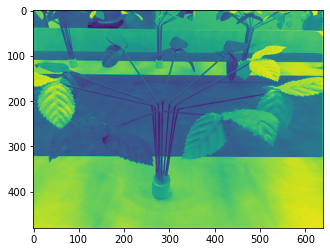

In [48]:
img_slope = cv2.imread(path + 'test'+ '1' + '.jpg', 0) # (480, 640, 3) col, row, channel

center = [205, 285]
# img_slope[:,:,1] = img_slope[:,:,1] - 20
plt.imshow(img_slope)
# plt.imshow(img_slope[:,:,1])

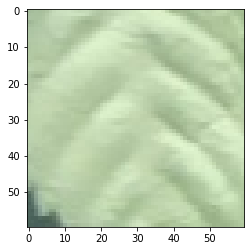

In [29]:
# img_slope_test = cv2.rectangle(img_slope,(384,0),(510,128),(0,255,0),3) # (src,(left,top),(right,down),(b,g,r),thick)
# plt.imshow(img_slopetest)
white_win = [(20,180),(80,240)]
# img_slope = cv2.rectangle(img_slope,white_win[0],white_win[1],(0,255,0),3) 
# plt.imshow(img_slope)
white_roi = img_slope[180:240,20:80]
plt.imshow(white_roi)

In [30]:
np.mean(white_roi)

188.3649074074074